# <font color='deepskyblue'>Cosmology MCMC notebook </font>

## <font color='deepskyblue'>Preliminaries</font>

In [86]:
# Installing the required packages
try:
  import getdist
except:
  !pip install getdist
  import getdist

# Load required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate

# import pylab
import getdist, IPython, time
from numpy import random


# from IPython.display import Image
from getdist import plots, MCSamples, loadMCSamples

# just for printing! calculations should be performed with machine precision
%precision 3

'%.3f'


<font color='tomato'>
(NB: The equations you'll directly need to build your code are those $\boxed{\text{with a box around}}$)
</font>

## <font color='deepskyblue'>The $\Lambda$CDM Model</font>

The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model is our concordance cosmological model. It postulates a Universe that behaves according to **General Relativity**, filled with **baryons** (protons, neutrons - the stuff we and stars are made of!), **Cold Dark Matter (CDM)** and a **Cosmological Constant** $\Lambda$.

The expansion of the Universe is best described in terms of the **scale factor** $a$ (the "radius" of the Universe, conventionally set to 1 today) and the **Hubble rate** $H$. While photons (light rays) travel in the expanding universe they get redshifted, and this redshift is directly related to the size of the Universe when the photon was emitted compared to today:

$$ \frac{\lambda_{\rm obs}}{\lambda_{\rm em}} \equiv 1 + z_{\rm em} = \frac{1}{a_{\rm em}}$$


In the $\Lambda$CDM model (and at late enough times), this additionally simplifies to

$$
\begin{gathered}
\boxed{
H^2 = H_0^2\left[\Omega_\Lambda + \Omega_m (1+z)^3 + \Omega_k (1+z)^2\right]
}
\\
\boxed{
\Omega_m + \Omega_\Lambda + \Omega_k = 1
}
\end{gathered}
\tag{1}
$$

$H_0$ is the value of the Hubble rate *today*, and the parameters $\Omega_m$, $\Omega_\Lambda$ and $\Omega_k$ are dimensionless quantities indicating how much of the present expansion of the Universe is due to (non-relativistic) matter, cosmological constant $\Lambda$, and spatial curvature $k$. Note that the three $\Omega$'s are *not independent* (their sum is 1) and that we grouped together the contribution of baryons and CDM,

$$
\Omega_m = \Omega_{\rm CDM} + \Omega_{\rm b}
$$

and that we have evidence that independent evidence that $\Omega_b \approx 5$\%. NB: only $\Omega_m \geq 0$ makes physical sense, while in principle both $\Omega_\Lambda$ and $\Omega_k$ can be negative.

The present Hubble rate is conventionally parametrised in terms of the dimensionless $h$:

$$
\boxed{
  H_0 \equiv 100\,h\,\frac{\rm km}{\rm s\,Mpc}
}
\tag{2}
$$

where Mpc = Megaparsec and [parsec](https://en.wikipedia.org/wiki/Parsec) equals to about $3.26$ light years or $3.086 \cdot 10^{16}$ m.

In essence, these equations give us the relation between *what exists in the Universe* and *how the Universe expanded*. Measure one, I can tell you the other. This is precisely what we aim to do!

Time to define the function $H(z)$. Don't forget to include the useful parameters as arguments of the function, and to define `parsec`.

In [2]:
import math
from scipy import constants

# Defining parsec and megaparsec

parsec = constants.parsec
print("Parsec: " + str(parsec) + "m")
Mpc = (parsec)*10**6
print("Megaparsec: " + str(Mpc) + "m")

# Hubble rate calculations

def Hubble(z, H_0, OmegaM, OmegaL):
    OmegaK = 1 - OmegaL - OmegaM
    H = H_0 * np.sqrt(OmegaL + OmegaM * (1+z) ** 3 + OmegaK * (1+z) ** 2)
    return H

def mu(z, H_0, OmegaM, OmegaL) :  #Distance modulus (using eq. 4)
    5 * np.log10(dL(z, H_0, OmegaM, OmegaL)/10)

Parsec: 3.085677581491367e+16m
Megaparsec: 3.085677581491367e+22m


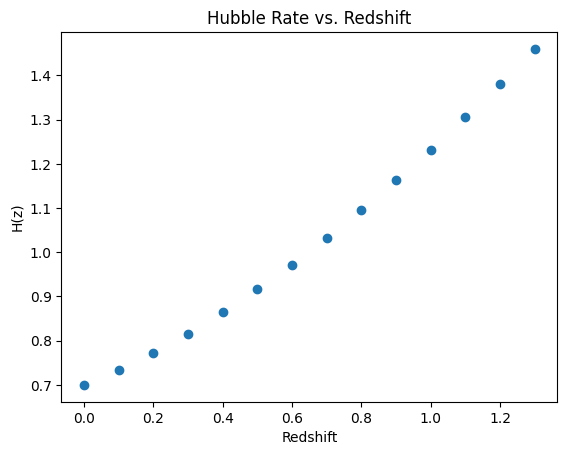

In [3]:
#Testing Hubble Rate vs. Red Shift Function function

%matplotlib inline
OmegaL = 0.7
OmegaM = 0.3
H_0 = 0.7

zs = np.arange(0, 1.4, 0.1)
Hs = []
for z in zs :
    Hs += [Hubble(z, H_0, OmegaM, OmegaL)]

plt.scatter(zs, Hs)
plt.title("Hubble Rate vs. Redshift")
plt.xlabel("Redshift")
plt.ylabel("H(z)")
plt.show()

## <font color='deepskyblue'>Supernovae Ia</font>

In order to track the expansion of the Universe, we will look at Supernovae type Ia observations. SNIa are formed when a *white dwarf* accretes matter from a companion until it reaches a critical mass of about $1.44 M_\odot$ (solar masses), after which it explodes **at always the same luminosity** $L_{\rm SN}$. Therefore, the observed [magnitude](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) is only a function of their [**luminosity distance**](https://en.wikipedia.org/wiki/Distance_measures_(cosmology)) from Earth, defined as the ratio of the intrinsic luminosity $L_{\rm SNIa}$ and the measured *surface brightness* $\Phi$ (energy per unit time per unit area)

$$ d_L\equiv \frac{L_{\rm SN}}{4\pi \Phi} $$

We can express the luminosity distance in terms of the Hubble rate:

$$
\boxed{
d_L(z) = \frac{c}{H_0}(1+z) \times
\begin{cases}
    \cfrac{1}{\sqrt{\Omega_k}} \,\sinh\left(\sqrt{\Omega_k}\,D(z)\right) & \Omega_k > 0
    \\[.5em]
    D(z) & \Omega_k = 0
    \\[.5em]
    \cfrac{1}{\sqrt{-\Omega_k}} \,\sin\left(\sqrt{-\Omega_k}\,D(z)\right) & \Omega_k < 0
\end{cases}
\qquad\qquad
D(z) \equiv H_0\int_0^z \frac{{\rm d}Z}{H(Z)}
}
\tag{3}
$$

where $c$ is the speed of light: $c \simeq 2.998 \cdot 10^{5}$ km/s.

Clearly, there exists a relation between $d_L(z)$ and $H(z)$, so the luminosity distance is a useful measure of the Universe expansion history.
In practice, however, the actual observable for [Supernovae Type Ia](https://en.wikipedia.org/wiki/Type_Ia_supernova) (or SNIa) is the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) $\mu$, defined as the difference between the *apparent magnitude* $m$ and the *absolute magnitude* $M$:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
\tag{4}
$$

We can create the function `dL(z, h, Omega_m, Omega_Lambda)`. You can also pass the function `Hubble` as an argument: `dL(z, Hubble, Omega_m, Omega_Lambda)`. Additionally, you can create $D(z)$ for your convenience.

Note that you need to integrate the function $H(z)$, so write your own quick-and-easy numerical integrator, for example implementing the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) or your favourite alternative, or [look up the pre-written methods](https://docs.scipy.org/doc/scipy/tutorial/integrate.html). Make sure it returns $d_L$ in parsecs and that it uses $H_0$ measured in units of 100 km/s/Mpc (which we called $h$).

In [4]:
# Calculating luminosity distance (dL).

SPEED_OF_LIGHT = 2.998e5 # Km/s

# Integrate 1/H from x = 0 to x = z
def D(z, H_0, OmegaM, OmegaL): # Yes, you can pass a function as argument!
    return H_0 * integrate.quad(lambda x: 1/Hubble(x, OmegaL, OmegaM, H_0), 0, z)[0]

def dL(z, OmegaL, OmegaM, H_0): # luminosity distance, use eq.(3)
    OmegaK = 1 - OmegaL - OmegaM
    Dz = D(z, H_0, OmegaM, OmegaL)

    if (OmegaK > 0) :
      dL = 1/np.sqrt(OmegaK) * np.sinh(np.sqrt(OmegaK) * Dz)

    elif (OmegaK == 0):
      dL = Dz

    else :
      dL = 1/np.sqrt(-OmegaK) * np.sin(np.sqrt(-OmegaK) * Dz)

    dL = 10 ** 4 * SPEED_OF_LIGHT / (H_0) * (1+z) * dL

    return dL

print(str(dL(1.5, 0.7, 0.3, 0.7)) + " parsecs") # example print

10909913873.790932 parsecs


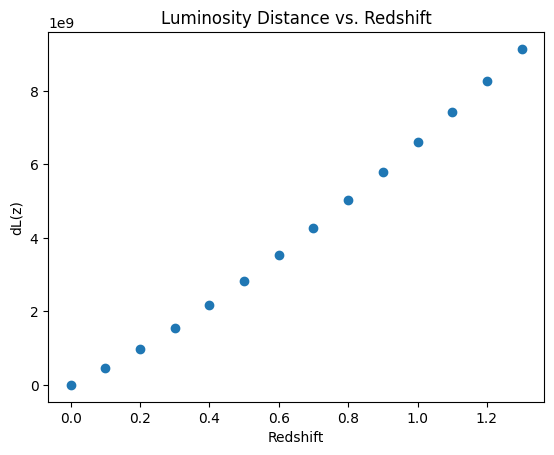

In [5]:
#Testing the Luminosity Distance vs Redshift function

%matplotlib inline

OmegaL = 0.7
OmegaM = 0.3
H_0 = 0.7

zs = np.arange(0, 1.4, 0.1)
dLs = []
for z in zs :
  dLs += [dL(z, OmegaL, OmegaM, H_0)]

plt.scatter(zs, dLs)
plt.title("Luminosity Distance vs. Redshift")
plt.xlabel("Redshift")
plt.ylabel("dL(z)")
plt.show()

In [6]:
# Calculating the distance modulus (mu):

def mu(z, H_0, OmegaM, OmegaL):  #Distance modulus (using eq. 4)
    return 5 * np.log10(dL(z, H_0, OmegaM, OmegaL)/10)   # 10 is in parsecs, assured unit consistency

print(mu(1.5, 0.7, 0.3, 0.7)) #test print
print(mu(1,0.8,0.1,0.7)) #test print

45.18910661073961
43.97074450529218


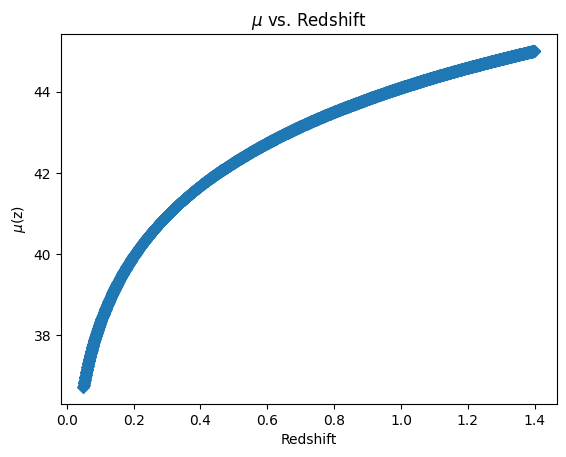

In [7]:
#Testing the Distance Modulus vs Redshift function

%matplotlib inline

OmegaL = 0.7
OmegaM = 0.3
H_0 = 0.7

zs = np.arange(0.05, 1.4, 0.001) #decrease step size to 0.001 to ensure the list is longer than 580 necessary for later steps)
mus = []
for z in zs :
  mus += [mu(z, H_0, OmegaM, OmegaL)]

plt.scatter(zs, mus, marker="D")
plt.title("${\mu}$ vs. Redshift")
plt.xlabel("Redshift")
plt.ylabel("${\mu}$(z)")
plt.show()

## <font color='deepskyblue'>The Union2.1 Compilation</font>

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/). It is a collection of $580$ SNIa, each observation is comprised of redshift $z$
Our goal today is to use SNIa measurements to constrain the parameters ($h, \Omega_\Lambda, \Omega_m$).

In essence, we can calculate for each redshift the theoretical value of $\mu$ using this equation with the expression for $d_L(z)$ and our model of choice $H(z)$ -- note that we will need to perform a numerical integral! -- and compare this value with observations. A different model would amount to changing the theoretical value of $H(z)$.

Let us start by importing and plotting the data:

In [8]:
# Loading the data
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"

# Read in data as numpy array.
# Format is [name, redshift, magnitude, magnitude error, and another number?]
data = np.genfromtxt(dataloc)

# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')
display(data[0])
display(data)

array([      nan, 2.849e-02, 3.535e+01, 2.239e-01, 1.284e-01])

array([[      nan, 2.849e-02, 3.535e+01, 2.239e-01, 1.284e-01],
       [      nan, 5.004e-02, 3.668e+01, 1.668e-01, 1.284e-01],
       [      nan, 5.293e-02, 3.682e+01, 1.558e-01, 1.284e-01],
       ...,
       [      nan, 8.210e-01, 4.364e+01, 1.940e-01, 5.517e-01],
       [      nan, 1.215e+00, 4.525e+01, 5.603e-01, 1.477e-04],
       [      nan, 6.230e-01, 4.251e+01, 2.414e-01, 5.517e-01]])

In [9]:
# Extracting the redshifts (zs), distance modulus (distance_modulus) and magnitude estimated errors (error_distance_modulus)

zs = data[:, 1] # redshifts
distance_modulus = data[:, 2] # distance modulus,
error_distance_modulus = data[:, 3] # errors on distance modulus = sigmas

In [10]:
# Visualising the data.

luminosity_distance_pc = 10. * 10.**(distance_modulus / 5.)

# and in Mpc
luminosity_distance_Mpc = luminosity_distance_pc / 10.**6. # this is mu

# and the error on that distance:
error_luminosity_distance_Mpc = 5. * (10.**((distance_modulus + error_distance_modulus)/5.-6.) - 10.**((distance_modulus - error_distance_modulus)/5.-6.))

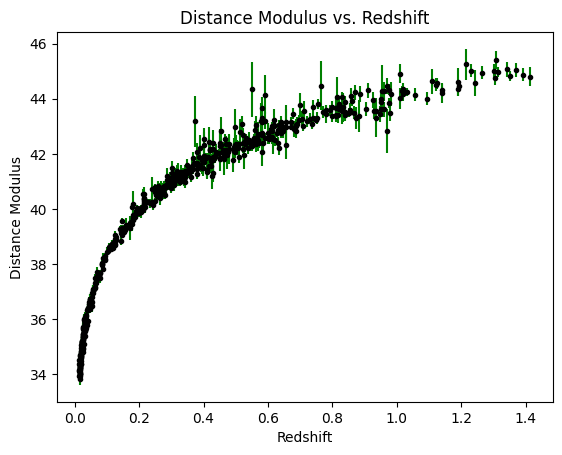

In [145]:
# Recommendation: you might want to try your functions here, and check that for h = 0.7 for Omega_m = 0.3 and Omega_L = 0.7 you get a decent match to the data
%matplotlib inline

plt.errorbar(zs, distance_modulus, yerr=data[:,3], fmt='o', markersize='3', color='k', ecolor='g')
plt.title("Distance Modulus vs. Redshift")
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
sorted_data = data[data[:,1].argsort()]

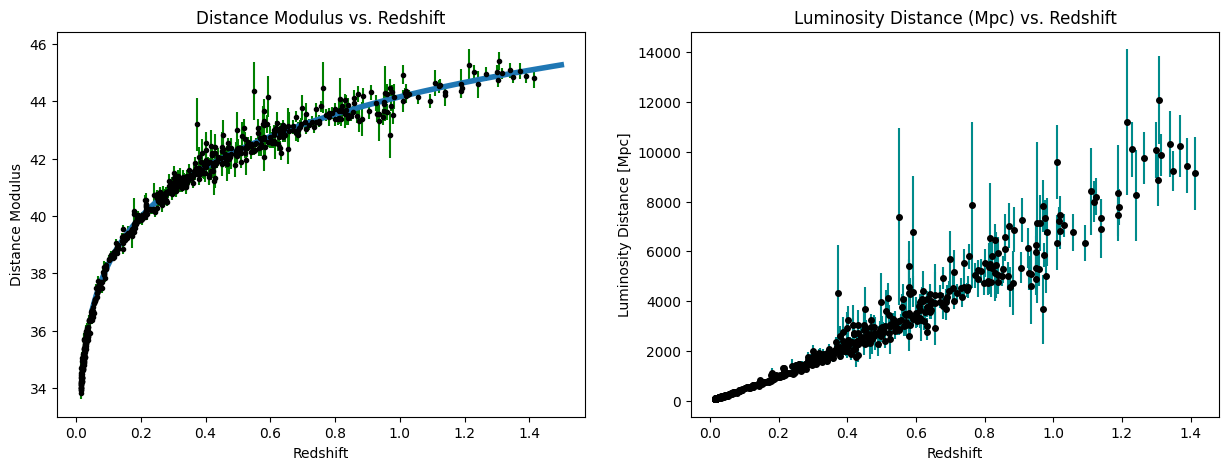

In [146]:
#Comparing the data to my models.

plt.subplots(1, 2, figsize=(15, 5))

modelzs = np.arange(0.05, 1.5, 0.001)

modelmus = []
for z in modelzs :
  modelmus += [mu(z, H_0, OmegaM, OmegaL)]

plt.subplot(1,2,1)
plt.title("Distance Modulus vs. Redshift")
plt.errorbar(zs, distance_modulus, yerr=data[:,3], fmt='o', markersize='3', color='k', ecolor='g')
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.plot(modelzs, modelmus, linewidth=4)


plt.subplot(1,2,2)
plt.title("Luminosity Distance (Mpc) vs. Redshift")
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, luminosity_distance_Mpc, yerr=error_luminosity_distance_Mpc, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.show()

Model fits data perfectly.


## <font color='deepskyblue'>Bayes' Theorem: Likelihood, Prior, Posterior (and Evidence...)</font>

The **conditional probability of A given that B is true** is denoted with $P(A|B)$ (read: *probability of A given B*).
Did A happen? Then B has probability $P(B|A)$ of happening.

[**Bayes' Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is simply a reflection of the symmetry of the concept of joint probability:

$$
P(A|B)P(B) = P(B|A)P(A)
$$

In physics, our goal is often to determine how likely the values of some parameters $\theta$ are, given how well they reproduce the data $D$.
We write Bayes' theorem in the following equivalent form:

$$
P(\theta | D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

The various terms conventionally take the names:

$$
\begin{aligned}
P(\theta | D) & && \text{Posterior}
\\
P(D | \theta)& && \text{Likelihood}
\\
P(\theta) & && \text{Prior}
\\
P(D) & && \text{Evidence}
\end{aligned}
$$

### <font color='deepskyblue'>Prior</font>

The *prior* quantifies our degree of prior belief in the model parameters. It can contain the results of previous experiments, or theoretical considerations (for instance, that certain parameters cannot be negative, etc.).

We can have *strong priors* about something - the Sun still existing at night, see the comic below - or not.
When we do *not* have compelling prior knowledge about a parameter, we generally use a *non-informative* prior probability distribution, most often related to the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$
\begin{aligned}
    \text{Uniform} & && \theta \in \text{Uniform}[\theta_{\rm min}, \theta_{\rm max}]
    \\
    \text{Log Uniform} & && \log\theta \in \text{Uniform}[\log\theta_{\rm min}, \log\theta_{\rm max}]
\end{aligned}
$$

You may sometimes hear that "the prior doesn't matter". While this is not strictly true, it is however true that in many instances the *likelihood* depends more dramatically on the parameters and will have a dominating contribution to the posterior. You are more than welcome to try different priors for the model parameters and see if and how your results change.

### <font color='deepskyblue'>Likelihood</font>

The measure of how well our model reproduces the data is the **likelihood** $\mathcal L$. For normal (=Gaussian), uncorrelated data $\mu_i$ with errors $\sigma_i$ ($i = \{1,580\}$), the likelihood is related to the famous [**chi-squared**](https://en.wikipedia.org/wiki/Chi-square_distribution) via

$$
P(D | \theta) \equiv \mathcal L = \exp\left(-\frac{\chi^2}{2}\right)
\qquad
\qquad
\boxed{
\chi^2 \equiv \sum_{i=1}^{580} \frac{\left(\mu_i^{(\rm theor)} - \mu_i^{(\rm obs)}\right)^2}{\sigma_i^2}
}
\tag{5}
$$

A *high likelihood* corresponds to a *low chi squared*.

In principle, we could attack the problem brute-force: create a grid of values for $h$, $\Omega_m$, $\Omega_\Lambda$, calculate the likelihood for each combination, and create a profile for the likelihood.

In practical cases, however, this is not only sub-optimal but sometimes **impossible**. Think of complicated models with 20+ free parameters (this is not unheard of, by the way). Even a very coarse grained grid of 100 values for each parameter would result in more than $10^{40}$ (!!!) different parameter combination to be tested. You can probably understand why this is undesirable.

### <font color='deepskyblue'>Evidence</font>

This is the tricky bit. The evidence, which is "*the probability of observing certain data*", is not something that is easy to evaluate or interpret. This looks like a serious limitation to finding the:


### <font color='deepskyblue'>Posterior</font>

What does the data tell us about the model parameters? The answer is the *posterior probability distribution*, often (but not necessarily) expressed as (average $\pm$ standard deviation)

$$
\theta_i = \bar\theta_i \pm \sigma_i
$$

In other words, the posterior tells us how likely it is for the model parameters to have certain values, *given that we observe the data* $D$.

*This is the final goal of our analysis!*

<br>

![title](http://1.bp.blogspot.com/-tTx4HDejSww/ULcTeK9_V_I/AAAAAAAAA8g/PCYOH-eXGbk/s1600/frequentists_vs_bayesians.png)
![title](https://i.redd.it/5r0hwixt0m931.jpg)

## <font color='deepskyblue'>Markov-Chain Monte Carlo</font>

Markov-Chain Monte Carlo techniques are a class of methods to sample a probability distribution $P(x)$ - in our case $P(\theta | D)$ - provided that we can calculate a density $\mathcal F(x)$ **that is proportional to it** - in our case $P(\theta)P(D|\theta)$ = likelihood $\times$ prior. Among these, a very popular one is the [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm, which is what we will use.

Schematically, the algorithm works as follows:
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and calculate the $\mathcal F_{\rm old}$
* Propose a new set of parameters $\theta_{\rm prop}$, calculate the new corresponding $\mathcal F_{\rm prop}$. How you propose the new parameters is not essential as long as the probability of going from one set of parameters to the next is the same as the inverse: $P(\theta_a \to \theta_b) = P(\theta_b \to \theta_a)$. For this, we normally take Gaussian displacements with some (relatively small) standard deviation.
* Compare the new and old likelihoods-priors:
    * If $\mathcal F_{\rm prop} > \mathcal F_{\rm old}$, accept the step: $\theta_{\rm new} = \theta_{\rm prop}$
    * Otherwise, accept with probability $P_{\rm accept} = \mathcal F_{\rm prop}/\mathcal F_{\rm old}$
* If accepted, $\theta_{\rm new} = \theta_{\rm prop}$ and record the step; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Update $\theta_{\rm old} = \theta_{\rm new}$
* Repeat

The MC chain keeps going until the desired number of steps or, ideally, when a suitable convergence test, like for example the [Gelman-Rubin test](https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html), is satisfied.
Today we will just set a limit to the total number of steps, but please feel free to implement and test your favourite convergence test!

Looking at equation (5), you can convince yourself that
$$
\frac{\mathcal L_a}{\mathcal L_b} = \exp\left(\frac{\chi_b^2 - \chi_a^2}{2}\right)
$$

(This is useful because $\chi^2$ can be large, so we want to avoid the likelihoods evaluating to `0.` -- computers don't like dividing by zero, unfortunately)


* <font color="deepskyblue"> Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and the corresponding chi squared $\chi_{\rm old}^2$ (to be clear, for us this implies calculating a series of 580 integrals and comparing each with the observed values) </font>
* <font color="deepskyblue"> Propose new parameters $\theta_{\rm prop}$ and calculate the corresponding chi squared $\chi_{\rm prop}^2$</font>
* <font color="deepskyblue"> Draw a random number $r \in [0,1]$</font>
* <font color="deepskyblue"> Accept the step if
$$
r < \exp\left(\frac{\chi_{\rm old}^2 - \chi_{\rm prop}^2}{2}\right) \frac{P(\theta)_{\rm prop}}{P(\theta)_{\rm old}}
$$</font>
    * <font color="deepskyblue"> If accepted, update $\theta_{\rm old} = \theta_{\rm prop}$</font>
    * <font color="deepskyblue">If you want, you can keep a record of the best fit (lowest $\chi^2$), but this is not the specific purpose of MCMC! We are exploring the parameter space and sampling a _posterior distribution_, not just finding the best fit</font>
* <font color="deepskyblue"> Record the step - including **re-recording** if the step was not accepted! </font>
* <font color="deepskyblue"> Repeat</font>

After completion of the programme, your MC chain will (*hopefully*) look something like this: (note the repeated entry!)

`#Omega_m  Omega_L  h`

`0.297     0.703    0.698`

`0.285     0.715    0.701`

`0.285     0.715    0.701`

`0.288     0.712    0.699`

`...`

In [113]:
# COnstructing my MCMC

from os import PRIO_USER
from numpy.lib.function_base import hamming
from numpy import random
import math

filename = "MC_Chain_SNIa.txt"
file = open(filename,"w")

print("#OmegaM\t#OmegaL\t#h\n")

#Number of steps in my chain. Runtime is roughly 5 minutes.

N_steps = 10000

#Initial parameters
OmegaL = 0.3
OmegaM = 0.3 # must be greater than 0 to make physical sense
h = 0.7

#Arrays to store the results for later

arrh, arrOmegaM, arrOmegaL, chisq_values = [],[],[],[]
accepted_steps = 0 # Accepted step counter to calculat acceptance rate later

# Calculating Chi Squared using equation 5

def chisq(OmegaL, OmegaM, h):
    sum_chi = 0
    for i in range(580):
        sum_chi += (((data[:, 2][i] - mu(data[:, 1][i], OmegaL, OmegaM, h)) ** 2) / (data[:, 3][i]) ** 2)  #After researching, I found that the chi squared calculation can be written in this way (mu observed minus mu expected) because the value is squared so the order of operation is irrelevant
    return sum_chi

old_chisq = chisq(OmegaL, OmegaM, h)

# Iterating over the 10000 steps

for i in range(N_steps):

# Displacements (Random Gaussian)
  Omega_L_New = OmegaL + np.random.normal(0,0.01)
  Omega_M_New = OmegaM + np.random.normal(0,0.01)
  h_New =  h + np.random.normal(0,0.01)

  if Omega_M_New <= 0 or h_New <= 0: # only considering h > 0 because expecting an expanding universe
        continue  # Skip this iteration and don't execute the rest of the loop body

  prop_chisq = chisq(Omega_L_New, Omega_M_New, h_New)

  delta_chisq = old_chisq - prop_chisq   # calculating the difference between the old chi squared and the proposed chi squared values.


 #Setting restraints for the difference value to prevent overflow.

  if delta_chisq > 700:  # This threshold prevents overflow in math.exp().  Needed some help from ChatGPT for this because i kept getting overflow error
      compval = float('inf')  # Certain acceptance
  elif delta_chisq < -700:  # Prevents underflow leading to zero
      compval = 0  # Certain rejection
  else:
      compval = math.exp(delta_chisq / 2)

  #Comparing likelihjood ratio. If it passes the new parameterss are set as the old and recorded. If it fails, the old paramters are re-recorded.

  if np.random.random() < compval:
      OmegaL, OmegaM, h = Omega_L_New, Omega_M_New, h_New
      old_chisq = prop_chisq
      chisq_values.append(prop_chisq)
      accepted_steps += 1

# Adding the recorded parameters to arrays.

  arrOmegaL.append(OmegaL)
  arrOmegaM.append(OmegaM)
  arrh.append(h)
  print("{:.3f}\t{:.3f}\t{:.3f}".format(OmegaM, OmegaL, h)) #Prints values of parameters, repeated prints represent a step that was not accepted. Unnecessary to print but I found it quite satisfying.

acceptance_rate = accepted_steps/N_steps # Calculating the acceptance rate.

print(f"Acceptance rate: {acceptance_rate:.2%}")


print("Chi Squared: " + str(old_chisq)) #Prints final chisquare value
file.close();


Streaming output truncated to the last 5000 lines.
0.198	0.702	0.611
0.214	0.700	0.621
0.214	0.700	0.621
0.197	0.695	0.622
0.197	0.695	0.622
0.197	0.695	0.622
0.197	0.695	0.622
0.206	0.699	0.634
0.206	0.699	0.634
0.197	0.695	0.621
0.194	0.696	0.618
0.194	0.699	0.622
0.194	0.699	0.622
0.190	0.699	0.620
0.190	0.699	0.620
0.195	0.701	0.619
0.195	0.701	0.619
0.202	0.698	0.621
0.200	0.699	0.615
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.201	0.699	0.622
0.192	0.697	0.616
0.192	0.697	0.616
0.192	0.697	0.616
0.192	0.697	0.616
0.192	0.697	0.616
0.192	0.697	0.616
0.192	0.697	0.616
0.176	0.699	0.620
0.176	0.699	0.620
0.176	0.699	0.620
0.176	0.699	0.620
0.164	0.703	0.623
0.164	0.703	0.623
0.164	0.703	0.623
0.164	0.703	0.623
0.164	0.703	0.623
0.164	0.703	0.623
0.164	0.703	0.623
0.173	0.708	0.631
0.173	0.708	0

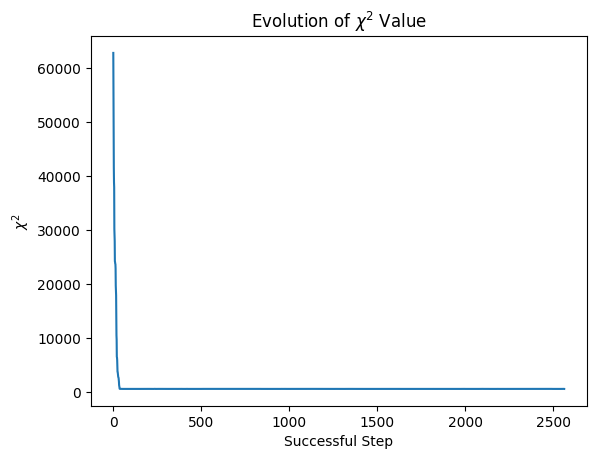

Best values: h = 0.6977407812828419 , OmegaM = 0.24514370415858447 , OmegaL = 0.7020428415600657


In [114]:
# Plot to show the evolution of the Chi Squared value over time.

plt.plot(chisq_values)
plt.title("Evolution of $\chi^{2}$ Value")
plt.xlabel("Successful Step")
plt.ylabel("$\chi^{2}$")
plt.show()

print("Best values: h = {} , OmegaM = {} , OmegaL = {}".format(h, OmegaM, OmegaL))

Chi Squared decreases over time, just as we were trying to achive.

## <font color='deepskyblue'>Plotting: GetDist</font>

We will do the plots with [`GetDist`](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

The plot gallery contains a lot of useful examples, you should be able to read them fairly easily and see which applies to your situation. Look for both (triangle) plots and for parameter estimation.

Note that many `GetDist` functions require arguments of type `MCSamples`; make sure you convert your lists accordingly.

<font color='deepskyblue'>
Look at your results. Do you obtain $\Omega_\Lambda \neq 0$? To a high degree of significance?

If yes, then my dear friend, you have **DISCOVERED THE ACCELERATED EXPANSION OF THE UNIVERSE AND WON THE NOBEL PRIZE IN PHYSICS 2011!**
</font>

Removed no burn in
0.62  <  h  <  0.77  at  68 % CL
0.2  <  OmegaM  <  0.33  at  68 % CL
0.7  <  OmegaL  <  0.7  at  68 % CL
-0.03  <  OmegaK  <  0.1  at  68 % CL




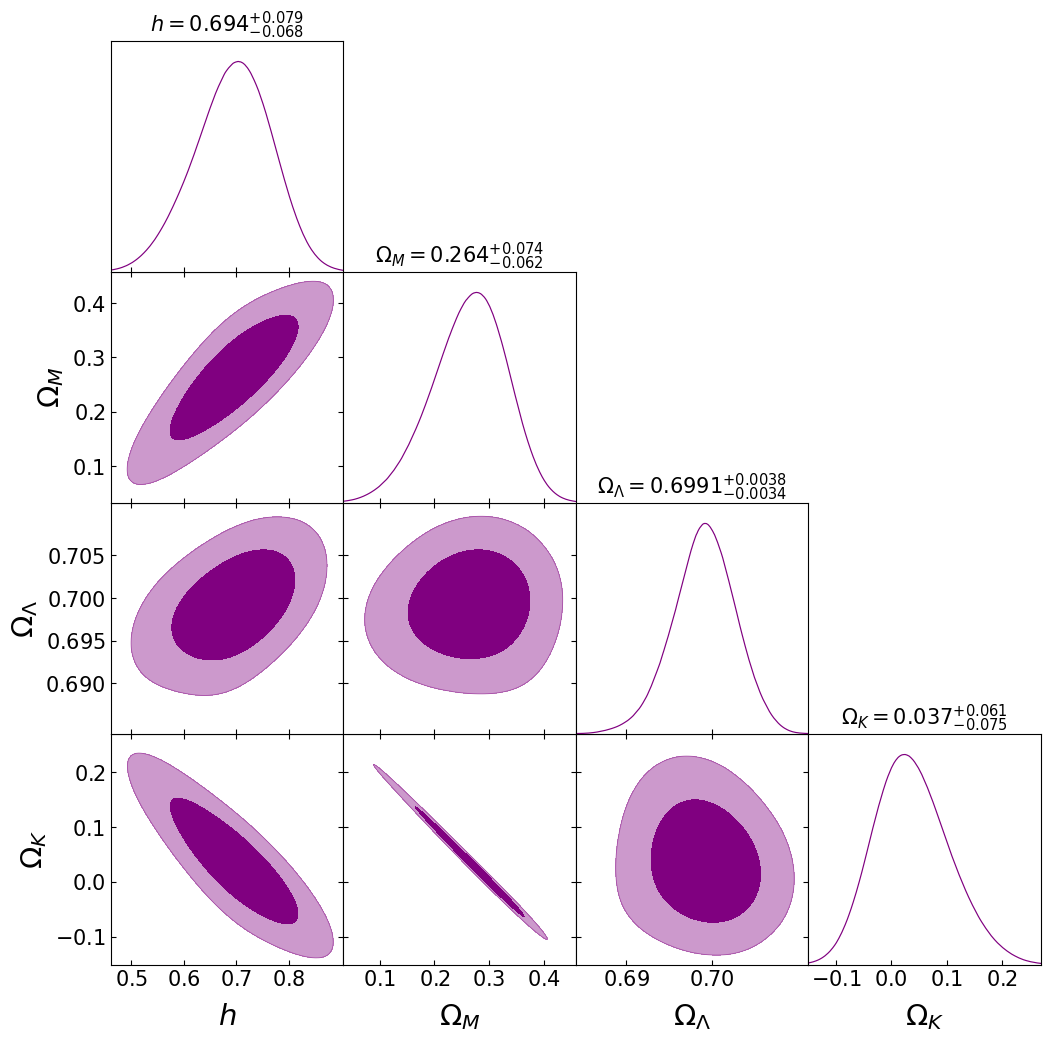

In [143]:
# Plotting triangle plots to find the Omega Lambda values. Let's win the Nobel Prize.

%matplotlib inline
burn_in_period = 2000  # Chose to burn 20% of the data. Chose this as it was the most common burn value I found. Also, did not distort the data.

# Remove burn-in samples from the MCMC chain data
h_array_burned = arrh[burn_in_period:]
OmegaM_array_burned = arrOmegaM[burn_in_period:]
OmegaL_array_burned = arrOmegaL[burn_in_period:]

OmegaK_array_burned = 1 - np.array(OmegaM_array_burned) - np.array(OmegaL_array_burned)


# Let's define variable names and labels
my_labels = [r'h', r'\Omega_M', r'\Omega_\Lambda', r'\Omega_K']
my_names = ['h', 'OmegaM', 'OmegaL', 'OmegaK']
my_dim = len(my_names) # The number of variables we're plotting

# This creates a higher-dimensional array with all our data, shaped in the appropriate way...
my_samples_burned = np.transpose(np.reshape([h_array_burned, OmegaM_array_burned, OmegaL_array_burned, OmegaK_array_burned], (my_dim, len(h_array_burned))))

# ... to create an "MCSamples" data type, which GetDist can use
my_samples_burned = MCSamples(samples = my_samples_burned, labels = my_labels, names = my_names)

# The usual 1-sigma confidence level. You can change to 2- or 3-sigma if you want
conf_level = 0.6827

# This prints a table with the 1D posteriors (confidence levels)
for nam in my_names:
    print(round(my_samples_burned.confidence(nam,(1.-conf_level)/2.,upper=False),2), \
          " < ", nam , " < ", round(my_samples_burned.confidence(nam,(1.-conf_level)/2.,upper=True),2),\
          " at " , int(100*conf_level),"\b% CL")
print("\n")

#Triangle corner plot
t = plots.getSubplotPlotter(subplot_size=3)
t.settings.solid_colors = ['purple']  # Changed colour to purple
t.settings.axes_labelsize = 22
t.settings.axes_fontsize = 16
t.triangle_plot(my_samples_burned, filled = True, title_limit=1)

As can be seen in the triangle plot, Omega Lambda does not equal 0, by a large value and with a significant degree of confidence. Thus, we can conclude that the universe is expanding and we are worthy of Noble prizes.

## <font color='deepskyblue'>Further Improvements</font>

There are many ways in which you can improve your code and/or your data visualisation. Some ideas, in random order:

* Modify your priors and compare your results. For instance:
  * Change to log-flat priors for $h$ and/or $\Omega_m$, namely displace them in log-space instead of linear space:
  $$
  \log(h_{\rm new}) = \log(h_{\rm old}) + \delta
  $$
  where $\delta$ a random variable of mean 0
  * Use priors from other cosmological probes, for example the [Planck 2018 results](https://arxiv.org/abs/1807.06209):
  $$
  \Omega_m = 0.315 \pm 0.007\,,~\dots
  $$
* Monitor acceptance ratio and $\chi^2$ as a function of step count
* Implement a Gelman-Rubin (or alternative) convergence test
* Change colours and other properties of your triangle plot
* Re-plot the data with your theoretical fits: you can try both your best fit, and some $1\sigma$ "error bars"
* Split your data in redshift bins and repeat the analysis for each bin individually.
<br> _(What do you notice? Which redshift bins give us the most accurate detection of the cosmological parameters?)_

Future Improvements:

In [144]:
# Using log-flat priors for h and Omega M and the Planck 2018 Results.


filename = "MC_Chain_SNIa_log_flat_priors.txt"  # New file name so the prior file is not affected
file = open(filename, "w")

print("#OmegaM\t#OmegaL\t#h\n")

N_steps = 10000

# Planck 2018 priors for Omega_M and h. Sourced from CHATGPT and tutorial.
planck_prior_OmegaM_mean = 0.315
planck_prior_OmegaM_std = 0.007
planck_prior_h_mean = 0.674
planck_prior_h_std = 0.004

# Initial parameters
OmegaL_log = 0.5
OmegaM_log = np.random.normal(planck_prior_OmegaM_mean, planck_prior_OmegaM_std)  # Sample from Planck 2018 prior
h_log = np.random.normal(planck_prior_h_mean, planck_prior_h_std)  # Sample from Planck 2018 prior

# Arrays for later
arrh_log, arrOmegaM_log, arrOmegaL_log = [], [], []
accepted_steps_log = 0
chisq_values_log = []

def chisq_log(OmegaL_log, OmegaM_log, h_log):
    sum_chi_log = 0
    for j in range(580):
        sum_chi_log += (((data[:, 2][j] - mu(data[:, 1][j], OmegaL_log, OmegaM_log, h_log)) ** 2) / (data[:, 3][j]) ** 2)
    return sum_chi_log

old_chisq_log = chisq_log(OmegaL_log, OmegaM_log, h_log)

for j in range(N_steps):

    OmegaL_log_New = OmegaL_log + random.normal(0,0.01)
    OmegaM_log_New = OmegaM_log * math.exp(random.normal(0,0.01)) #displaced in log-flat space
    h_log_New =  h_log * math.exp(random.normal(0,0.01)) #displaced in log flat space


    # Ensure positive values
    if OmegaM_log_New <= 0 or h_log_New <= 0:
        continue  # Skip this iteration and don't execute the rest of the loop body

    prop_chisq_log = chisq_log(OmegaL_log_New, OmegaM_log_New, h_log_New)
    delta_chisq_log = old_chisq_log - prop_chisq_log

    if delta_chisq_log > 700:
        compval_log = float('inf')  # Certain acceptance
    elif delta_chisq_log < -700:
        compval_log = 0  # Certain rejection
    else:
        compval_log = math.exp(delta_chisq_log / 2)

    # Does the comparison, if it passes the new params are set as the old and recorded
    if np.random.random() < compval_log:
        OmegaL_log, OmegaM_log, h_log = OmegaL_log_New, OmegaM_log_New, h_log_New
        old_chisq_log = prop_chisq_log
        chisq_values_log.append(prop_chisq_log)
        accepted_steps_log += 1

    arrOmegaL_log.append(OmegaL_log)
    arrOmegaM_log.append(OmegaM_log)
    arrh_log.append(h_log)
    # print("{:.3f}\t{:.3f}\t{:.3f}".format(OmegaM_log, OmegaL_log, h_log))  # Prints values of parameters
    # Repeated prints represent a step that was not accepted

acceptance_rate_log = accepted_steps_log / N_steps
print(f"Acceptance rate: {acceptance_rate_log:.2%}")

print("Chi Squared: " + str(old_chisq_log))  # Prints final chi-square value
file.close()


#OmegaM	#OmegaL	#h

Acceptance rate: 27.30%
Chi Squared: 564.308218554059


Resulsts appear similar to those of the linear, Gaussian displacements.

In [105]:
#Implementing a Gelman-Rubin convergence test. Aditionally making modifying the prior parameters.

# Number of chains
num_chains = 4

# Number of steps per chain
N_steps = 5000

# Initial parameters for each chain
initial_parameters = [(0.3, 0.3, 0.7),  # Chain 1
                      (0.32, 0.28, 0.68),  # Chain 2
                      (0.35, 0.25, 0.65),  # Chain 3
                      (0.28, 0.32, 0.72)]  # Chain 4

# Looping over each chain
for chain_index, initial_parameter in enumerate(initial_parameters, start=1):
    print(f"Chain {chain_index}:")

    # Unpacking the initial parameters
    OmegaL, OmegaM, h = initial_parameter

    # Creating arrays to store parameter values
    arrh, arrOmegaM, arrOmegaL, chisq_values = [], [], [], []
    accepted_steps = 0


    # Running the same MCMC algorithm as earier for the 4 chains.

    old_chisq = chisq(OmegaL, OmegaM, h)
    for i in range(N_steps):
        # Displacements (Random Gaussian)
        Omega_L_New = OmegaL + np.random.normal(0, 0.01)
        Omega_M_New = OmegaM + np.random.normal(0, 0.01)
        h_New = h + np.random.normal(0, 0.01)

        if Omega_M_New <= 0 or h_New <= 0: # only considering h > 0 because expecting an expanding universe
            continue  # Skip this iteration and don't execute the rest of the loop body

        prop_chisq = chisq(Omega_L_New, Omega_M_New, h_New)

        delta_chisq = old_chisq - prop_chisq

        if delta_chisq > 700:
            compval = float('inf')
        elif delta_chisq < -700:
            compval = 0
        else:
            compval = math.exp(delta_chisq / 2)

        if np.random.random() < compval:
            OmegaL, OmegaM, h = Omega_L_New, Omega_M_New, h_New
            old_chisq = prop_chisq
            chisq_values.append(prop_chisq)
            accepted_steps += 1

        arrOmegaL.append(OmegaL)
        arrOmegaM.append(OmegaM)
        arrh.append(h)
        print("{:.3f}\t{:.3f}\t{:.3f}".format(OmegaM, OmegaL, h)) #Apologies for the numeroud prints, again I found it satisfying.

    acceptance_rate = accepted_steps / N_steps
    print(f"Acceptance rate: {acceptance_rate:.2%}")
    print("Chi Squared: " + str(old_chisq)) #prints final chisquare value
    print()


# Collecting samples from each chain for each parameter.

chain_samples = np.array([arrh, arrOmegaM, arrOmegaL])

num_chains = chain_samples.shape[0]
num_samples = chain_samples.shape[1]

# Following fucntions were sourced from ChatGPT.

# Function to compute the within-chain variance for a parameter.

def within_chain_variance(samples):
    return np.var(samples,ddof=1)

# Function to compute the between-chain variance for a parameter
def between_chain_variance(samples):
    mean_across_chains = np.mean(samples, axis=0)
    mean_of_means = np.mean(mean_across_chains)
    return np.sum((mean_across_chains - mean_of_means)**2) / (num_chains - 1)

# Computing the within-chain and between-chain variances for each parameter

within_variances = np.apply_along_axis(within_chain_variance, axis=1, arr=chain_samples)
between_variances = np.apply_along_axis(between_chain_variance, axis=1, arr=chain_samples)


pooled_mean_variances = ((num_samples - 1) / num_samples) * within_variances + (1 / num_samples) * between_variances

# Computing the potential scale reduction factor (Gelman-Rubin statistic) for each parameter. Also known as the R hat values.

R_hat_values = np.sqrt(pooled_mean_variances / within_variances)

# Printing the Gelman-Rubin statistics for each parameter
parameter_names = ['h', 'OmegaM', 'OmegaL']
for i, parameter in enumerate(parameter_names):
    print(f"Gelman-Rubin statistic for {parameter}: {R_hat_values[i]}")



Streaming output truncated to the last 5000 lines.
0.331	0.330	0.724
0.322	0.342	0.722
0.321	0.349	0.736
0.321	0.349	0.736
0.321	0.349	0.736
0.344	0.349	0.730
0.348	0.355	0.741
0.351	0.359	0.734
0.333	0.366	0.740
0.353	0.368	0.741
0.353	0.368	0.741
0.357	0.373	0.727
0.355	0.376	0.726
0.364	0.402	0.706
0.367	0.422	0.694
0.367	0.422	0.694
0.367	0.422	0.694
0.370	0.425	0.706
0.370	0.425	0.706
0.388	0.438	0.699
0.388	0.438	0.699
0.388	0.438	0.699
0.388	0.438	0.699
0.388	0.438	0.699
0.391	0.442	0.694
0.391	0.442	0.694
0.391	0.442	0.694
0.391	0.442	0.694
0.398	0.445	0.701
0.398	0.445	0.701
0.398	0.445	0.701
0.398	0.445	0.701
0.394	0.455	0.710
0.394	0.455	0.710
0.403	0.460	0.721
0.403	0.460	0.721
0.399	0.479	0.714
0.399	0.479	0.714
0.394	0.480	0.718
0.410	0.481	0.720
0.410	0.481	0.720
0.405	0.482	0.714
0.413	0.482	0.716
0.419	0.482	0.714
0.407	0.483	0.718
0.407	0.483	0.718
0.419	0.496	0.726
0.419	0.496	0.726
0.419	0.496	0.726
0.408	0.505	0.728
0.405	0.510	0.736
0.394	0.512	0.741
0.394	0.512	0

Since the Gelman-Rubin statistics for all three parameters are extremely close to 1, it is suggested that all three of these parameters converge.
